# 1. 라이브러리 호출 및 I/O

In [21]:
# 데이터 분석 라이브러리
import numpy as np
import pandas as pd

# 시각화 라이브러리
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

import os
for dirname, _, filename in os.walk('~/kaggle/'):
    for filename in filenames:
        print(os.path.join(dirname, filename))
        
sns.set_style("whitegrid")

In [2]:
# 데이터 불러오기
# csv 파일로 제공되는 정형데이터는 pd.read_csv() 로 읽어옴.

train_data = pd.read_csv('./train_1st_income.csv')
test_data = pd.read_csv('./test_1st_income.csv')

# 2. Pandas에 메서드로 보는 간단한 탐색

In [3]:
train_data.head()

,id,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,income
0,0,40,Private,168538,HS-grad,9,Married-civ-spouse,Sales,Husband,White,Male,0,0,60,United-States,>50K
1,1,17,Private,101626,9th,5,Never-married,Machine-op-inspct,Own-child,White,Male,0,0,20,United-States,<=50K
2,2,18,Private,353358,Some-college,10,Never-married,Other-service,Own-child,White,Male,0,0,16,United-States,<=50K
3,3,21,Private,151158,Some-college,10,Never-married,Prof-specialty,Own-child,White,Female,0,0,25,United-States,<=50K
4,4,24,Private,122234,Some-college,10,Never-married,Adm-clerical,Not-in-family,Black,Female,0,0,20,?,<=50K



    1) age : 나이
    2) workclass : 고용 형태
    3) fnlwgt : 사람 대표성을 나타내는 가중치 (final weight의 약자)
    4) education : 교육 수준
    5) education_num : 교육 수준 수치
    6) marital_status: 결혼 상태
    7) occupation : 업종
    8) relationship : 가족 관계
    9) race : 인종
    10) sex : 성별
    11) capital_gain : 양도 소득
    12) capital_loss : 양도 손실
    13) hours_per_week : 주당 근무 시간
    14) native_country : 국적
    15) income : 수익 (예측해야 하는 값)


* 각 featur에 대한 통합정보


## 1. [ .info() ]: 수치형


## 2. [ .describe() ]: 범주형

In [4]:
# 각 featur에 대한 통합정보 (1) [ .info() ]

train_data.info()

# object인 feature은 대부분의 머신러닝 모델에 직접적인 입력값으로 사용할 수 없는 
# 수치형이 아닌 자료형으로 대부분 string!!

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26049 entries, 0 to 26048
Data columns (total 16 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   id              26049 non-null  int64 
 1   age             26049 non-null  int64 
 2   workclass       26049 non-null  object
 3   fnlwgt          26049 non-null  int64 
 4   education       26049 non-null  object
 5   education_num   26049 non-null  int64 
 6   marital_status  26049 non-null  object
 7   occupation      26049 non-null  object
 8   relationship    26049 non-null  object
 9   race            26049 non-null  object
 10  sex             26049 non-null  object
 11  capital_gain    26049 non-null  int64 
 12  capital_loss    26049 non-null  int64 
 13  hours_per_week  26049 non-null  int64 
 14  native_country  26049 non-null  object
 15  income          26049 non-null  object
dtypes: int64(7), object(9)
memory usage: 3.2+ MB


In [5]:
train_data.describe()

,id,age,fnlwgt,education_num,capital_gain,capital_loss,hours_per_week
count,26049.000000,26049.000000,2.604900e+04,26049.000000,26049.00000,26049.000000,26049.000000
mean,13024.000000,38.569235,1.903045e+05,10.088372,1087.68970,87.732734,40.443126
std,7519.842917,13.671489,1.059663e+05,2.567610,7388.85469,403.230205,12.361850
min,0.000000,17.000000,1.376900e+04,1.000000,0.00000,0.000000,1.000000
25%,6512.000000,28.000000,1.181080e+05,9.000000,0.00000,0.000000,40.000000
50%,13024.000000,37.000000,1.788660e+05,10.000000,0.00000,0.000000,40.000000
75%,19536.000000,48.000000,2.377350e+05,12.000000,0.00000,0.000000,45.000000
max,26048.000000,90.000000,1.484705e+06,16.000000,99999.00000,4356.000000,99.000000


In [6]:
# 범주형 데이터인 경우 include = 'O(영어 O)'을 추가하여 확인 가능!

train_data.describe(include="O")

# unique: 범주의 개수 / top: 상위 범주 / freq: 빈도수

,workclass,education,marital_status,occupation,relationship,race,sex,native_country,income
count,26049,26049,26049,26049,26049,26049,26049,26049,26049
unique,9,16,7,15,6,5,2,41,2
top,Private,HS-grad,Married-civ-spouse,Prof-specialty,Husband,White,Male,United-States,<=50K
freq,18123,8433,11970,3304,10541,22315,17482,23371,19744


In [10]:
#각 범주형 데이터는 어떤 feature을 가지고 있는지 보기
#구성요소 살펴보기

for col in train_data.columns:
    if train_data[col].dtype == 'object':
        categories = train_data[col].unique()
        print(f'[{col}] ({len(categories)})')  # [열 이름] (카테고리 개수)
        print(categories)   # '\n'.join(categories)로 프린트 하면 카테고리가 한줄씩
        print()

[workclass] (9)
['Private' 'State-gov' '?' 'Self-emp-not-inc' 'Local-gov' 'Federal-gov'
 'Self-emp-inc' 'Without-pay' 'Never-worked']

[education] (16)
['HS-grad' '9th' 'Some-college' 'Bachelors' '11th' '1st-4th' '5th-6th'
 'Assoc-acdm' '10th' 'Prof-school' '7th-8th' 'Masters' 'Assoc-voc'
 'Doctorate' '12th' 'Preschool']

[marital_status] (7)
['Married-civ-spouse' 'Never-married' 'Separated' 'Married-spouse-absent'
 'Divorced' 'Widowed' 'Married-AF-spouse']

[occupation] (15)
['Sales' 'Machine-op-inspct' 'Other-service' 'Prof-specialty'
 'Adm-clerical' 'Craft-repair' '?' 'Handlers-cleaners' 'Farming-fishing'
 'Exec-managerial' 'Transport-moving' 'Protective-serv' 'Tech-support'
 'Priv-house-serv' 'Armed-Forces']

[relationship] (6)
['Husband' 'Own-child' 'Not-in-family' 'Unmarried' 'Wife' 'Other-relative']

[race] (5)
['White' 'Black' 'Asian-Pac-Islander' 'Other' 'Amer-Indian-Eskimo']

[sex] (2)
['Male' 'Female']

[native_country] (41)
['United-States' '?' 'Mexico' 'Poland' 'Philippine

# 3. 데이터 분포를 살피는 시각화

데이터의 분포는 다음과 같이 살필 수 있습니다. 대표적인 몇 가지만 살펴보도록 하겠습니다.

    범주형 : bar
    수치형
        이산형 : bar
        연속형 : kdeplot, histogram
    범주형 + 수치형 : boxplot, violinplot, etc
    수치형 + 수치형 : scatter

    이 외에도 다양한 방법이 존재하니 찾아보시는 것을 추천합니다.


## 3-1. 범주형 데이터의 분포

In [7]:
# 범주형 feature의 unique한 범주 개수

for col in train_data.columns:
    if train_data[col].dtype == 'object':
        categories = train_data[col].unique()
        print(f'[{col}] ({len(categories)})')

[workclass] (9)
[education] (16)
[marital_status] (7)
[occupation] (15)
[relationship] (6)
[race] (5)
[sex] (2)
[native_country] (41)
[income] (2)


## .value_count()

전반적으로 범주의 수가 많아 전처리 이전에는 2개 이상의 feature를 한 plot에서 보기에는 조금 효율성이 떨어질 것 처럼 보입니다. pandas의 value_counts를 사용하면 같은 범주의 개수를 쉽게 셀 수 있습니다. 

In [12]:
train_data['race'].value_counts()

White                 22315
Black                  2476
Asian-Pac-Islander      800
Amer-Indian-Eskimo      254
Other                   204
Name: race, dtype: int64

In [13]:
train_data['workclass'].value_counts()

Private             18123
Self-emp-not-inc     2030
Local-gov            1692
?                    1502
State-gov            1043
Self-emp-inc          877
Federal-gov           765
Without-pay            11
Never-worked            6
Name: workclass, dtype: int64

In [14]:
train_data['income'].value_counts()

<=50K    19744
>50K      6305
Name: income, dtype: int64

In [15]:
train_data['education'].value_counts()

HS-grad         8433
Some-college    5800
Bachelors       4344
Masters         1378
Assoc-voc       1096
11th             922
Assoc-acdm       842
10th             731
7th-8th          505
Prof-school      466
9th              418
12th             359
Doctorate        316
5th-6th          265
1st-4th          134
Preschool         40
Name: education, dtype: int64

In [11]:
train_data['sex'].value_counts()

Male      17482
Female     8567
Name: sex, dtype: int64

그리고 이를 matplotlib으로 그릴 수도 있지만, seaborn을 사용하면 다음과 같이 그릴 수 있습니다.

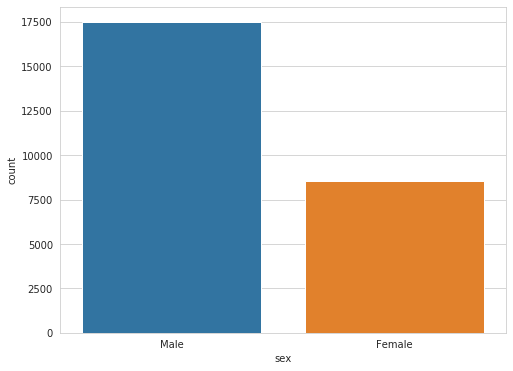

In [16]:
fig, ax = plt.subplots(1, 1, figsize=(8,6))
sns.countplot(x='sex', data=train_data)
plt.show()

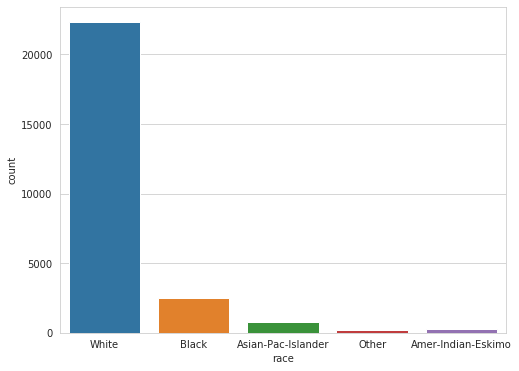

In [17]:
fig, ax = plt.subplots(1, 1, figsize=(8,6))
sns.countplot(x='race', data=train_data)
plt.show()

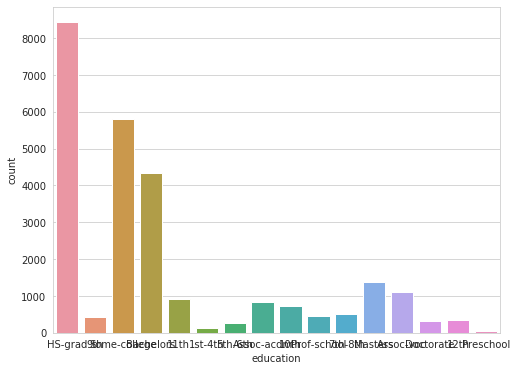

In [18]:
fig, ax = plt.subplots(1, 1, figsize=(8,6))
sns.countplot(x='education', data=train_data)
plt.show()

다음과 같이 **custom** 할 수도 있습니다.

- eda의 핵심은 본인, 그리고 타인의 가독성을 생각하며 작성하는 것입니다.
- 여백, 축, 공간, 텍스트 등의 내용을 활용하시면 됩니다.

In [23]:
fig, axes = plt.subplot(1,2, figsize=(13,7), sharey=True)

sns.countplot(x='sex', data=train_data, ax=axes[0], palette="Set2", edgecolor="pink")
sns.countplot(x='incomey', data=train_data, ax=axes[1], color='gray', edgecolor='black')

# Margin & Label 조정
for ax in axes:
    ax.margins(0.12, 0.15)
    ax.xaxis.label.set_size(12)
    ax.xaixs.label.set_weight('bold')
    
# figure title
plt.suptitle('Categorical Distribution', 
             fontsize=17, fontweight='bold', x=0.05, y=1.06, ha='left' # horizontal alignment)

plt.tight_layout()
plt.show()

SyntaxError: invalid syntax (<ipython-input-23-30806de79faa>, line 16)